In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [9]:
embeddings = np.load("chest-xray14_embeddings.npy")
annotation = pd.read_csv('Data_Entry_2017.csv')
annotation.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [15]:

file_path = "selected_png_list.txt"
ids = []

with open(file_path, 'r') as file:
    for line in file:
        full_path = line.strip()  
        filename = os.path.basename(full_path)
        ids.append(filename)

label_dict = annotation.set_index('Image Index')['Finding Labels'].to_dict()

labels = []
for id in ids:
    if label_dict[id] == 'No Finding':
        labels.append(0)
    else:
        labels.append(1)
#print(len(labels))

labels_arr = np.array(labels)[:, np.newaxis]

embeddings_labeled = np.column_stack((embeddings, labels_arr))

#print(embeddings_labeled[:3])

[[-0.0538576   0.00995135  0.04935905 ...  0.00644073  0.05660105
   1.        ]
 [-0.05293966 -0.05798699  0.01407015 ...  0.01265656  0.02598063
   0.        ]
 [-0.01355517 -0.01268439  0.00450761 ...  0.0033815   0.00534222
   1.        ]]


PC1 variance: 0.10726348
PC2 variance: 0.07446498
(9600, 2)


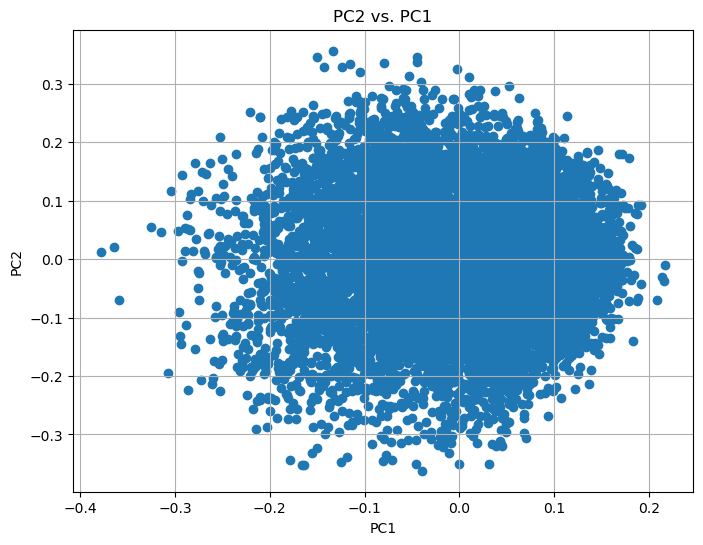

In [5]:
df = embeddings

mc_df = df - np.mean(df, axis=0)
N, k = mc_df.shape

S = (1/N) * mc_df.transpose() @ mc_df

eig_val, eig_vectors = np.linalg.eigh(S)

eig_val_desc = eig_val[::-1]
print("PC1 variance:", eig_val_desc[0]/np.sum(eig_val_desc))
print("PC2 variance:", eig_val_desc[1]/np.sum(eig_val_desc))

reduced_df = mc_df @ eig_vectors[:, -2:]
print(reduced_df.shape)


x = reduced_df[:, 0]
y = reduced_df[:, 1]

# Creating the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.title('PC2 vs. PC1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.savefig('init_averaged_PCA.png', dpi=300)
plt.show()


